In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2
import imghdr
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
import pathlib
data_dir = '/content/drive/MyDrive/dataset'
data_dir = pathlib.Path(data_dir)

In [ ]:
# Create Dataset
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
# Define image preprocessing options
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
# Load training data
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training')

Found 901 images belonging to 4 classes.


In [ ]:
# Load validation data
val_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation')

Found 224 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
29/29 [==============================] - 375s 13s/step - loss: 0.8906 - accuracy: 0.6371 - val_loss: 0.6180 - val_accuracy: 0.8259
Epoch 2/10
29/29 [==============================] - 44s 2s/step - loss: 0.5175 - accuracy: 0.8246 - val_loss: 0.4613 - val_accuracy: 0.8304
Epoch 3/10
29/29 [==============================] - 40s 1s/step - loss: 0.3881 - accuracy: 0.8657 - val_loss: 0.7704 - val_accuracy: 0.7545
Epoch 4/10
29/29 [==============================] - 44s 2s/step - loss: 0.3929 - accuracy: 0.8613 - val_loss: 0.5151 - val_accuracy: 0.8080
Epoch 5/10
29/29 [==============================] - 40s 1s/step - loss: 0.3393 - accuracy: 0.8846 - val_loss: 0.4413 - val_accuracy: 0.8393
Epoch 6/10
29/29 [==============================] - 46s 2s/step - loss: 0.2654 - accuracy: 0.8990 - val_loss: 0.4084 - val_accuracy: 0.8125
Epoch 7/10
29/29 [==============================] - 44s 2s/step - loss: 0.2405 - accuracy: 0.9090 - val_loss: 0.5835 - val_accuracy: 0.7812
Epoch 8/10
29/29 [

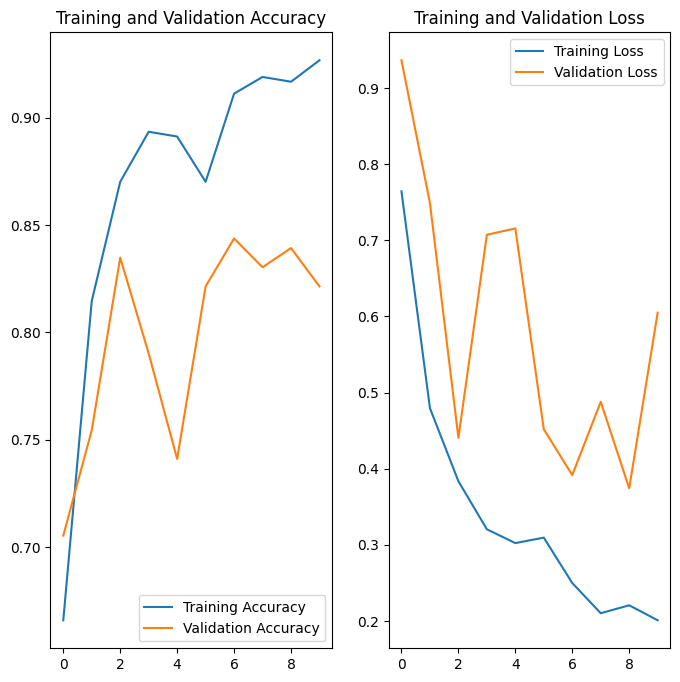

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#change cloudy to either "rain", "cloudy", "shine", or "sunrise" to test the 4 test images
img_path = '/content/drive/MyDrive/Test_Images/cloudy.jpg'
img = Image.open(img_path)

In [ ]:
img = img.resize((img_height, img_width))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)
img = tf.convert_to_tensor(img)

In [ ]:
probs = model.predict(img)[0]

1/1 [==============================] - 0s 31ms/step


In [ ]:
class_idx = tf.argmax(probs).numpy()
class_label = class_names[class_idx]
print(class_names)
print(probs)

['Cloudy', 'Rain', 'Shine', 'Sunrise']
[ 3.426627    2.555254    0.13879254 -5.412885  ]


In [ ]:

confidence_pct = probs[tf.argmax(probs)] * 100
print(f"The image is classified as {class_label}")

The image is classified as Cloudy


In [ ]:
model.save('/content/drive/MyDrive/my_cnn_model.h5')